# Convoluntional Neural Networks

<div style="display: flex; align-items: center;">
    <img src="../imgs/CNN.jpg" alt="Your Image" width="600" style="margin-right: 20px;">
    <div>
        <p>Convolutional Neural Networks are deep learning models or multi-layer perceptrons similar to artificial neural networks, commonly used to analyze visual images. The founder of convolutional neural networks is renowned computer scientist Yann LeCun. He was the first person to solve handwritten digit problems using convolutional neural networks on the MNIST dataset.</p>
        <p>The architecture of convolutional neural networks is very similar to that of conventional artificial neural networks, especially in the last layer of the network, which is fully connected. Furthermore, it is noted that convolutional neural networks can accept multiple feature maps as inputs rather than vectors.</p>
    </div>
</div>

A convolutional neural network mainly consists of the following 5 layers:
- **Data input layer/Input layer**: Preprocessing the raw image data.(In this chapter, we don't use it, because we have already preprocessed the MNIST data in the class MNISTTrainer.)
- **Convolutional computation layer/CONV layer**: Processing image data, which extracts image features by performing element multiplication operations on the input image through filters (also known as convolution kernels) and summing them up.
- **ReLU incentive layer**: Perform nonlinear mapping on the output results of convolutional layers.
- **Pooling layer**: Used to compress data and parameters, reduce overfitting
- **Fully connected layer/FC layer**: Like MLP.

## CNN
Before building model.Let's see the parameters of the two new layers:<br>
**nn.Conv2d**:<br>`in_channels`: Input channels.<br>`out_channels`: Output channels.<br>`kernel_size`: Size of the convolutional kernel.<br>`stride`: Stride of the convolution.<br>`padding`: Zero-padding added to both sides of the input.<br>
**nn.MaxPool2d**:<br>`kernel_size`: Size of the max pooling window.<br>`stride`: Stride of the max pooling operation.

In [13]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # we can see fc1 and fc2 as a MLP
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Use class MINISTTrainer to train CNN

D:\Anaconda\envs\bdl\lib\site-packages\torch\amp\grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


2024-05-14 17:44:34
Epoch 1 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 14.70it/s, val_acc=97.7, val_loss=0.000297]


2024-05-14 17:44:56
Epoch 2 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 14.30it/s, val_acc=97.9, val_loss=0.000275]


2024-05-14 17:45:18
Epoch 3 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 14.11it/s, val_acc=97.9, val_loss=0.000292]


2024-05-14 17:45:41
Epoch 4 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 13.88it/s, val_acc=98.5, val_loss=0.000211]


2024-05-14 17:46:04
Epoch 5 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 13.62it/s, val_acc=98.5, val_loss=0.000234]


2024-05-14 17:46:28
Epoch 6 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 13.63it/s, val_acc=98.2, val_loss=0.000286]


2024-05-14 17:46:52
Epoch 7 / 10


[Valid]: 100%|██████████████████████| 24/24 [00:01<00:00, 13.52it/s, val_acc=98.6, val_loss=0.00023]


2024-05-14 17:47:17
Epoch 8 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 13.42it/s, val_acc=98.6, val_loss=0.000241]


2024-05-14 17:47:41
Epoch 9 / 10


[Valid]: 100%|██████████████████████| 24/24 [00:01<00:00, 13.41it/s, val_acc=98.5, val_loss=0.00027]


2024-05-14 17:48:06
Epoch 10 / 10


[Valid]: 100%|█████████████████████| 24/24 [00:01<00:00, 13.39it/s, val_acc=98.5, val_loss=0.000309]


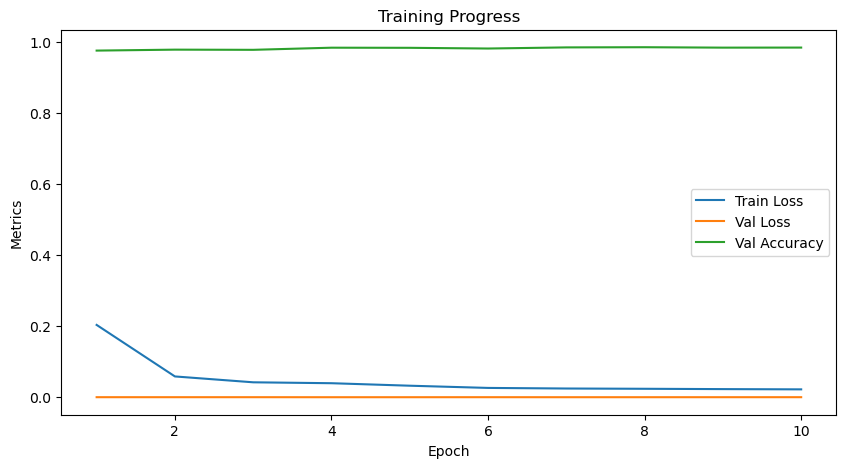

In [9]:
import sys
sys.path.append('../tools')
from MNIST import MNISTTrainer

model = CNN()
trainer = MNISTTrainer(model, loss='CE', lr=0.01, optimizer='Adam', batch_size=256, epoch=10, model_type='classification')
trainer.train()

In [12]:
trainer.test()

Testing [Test]: 100%|███████████████████████████████| 40/40 [00:02<00:00, 15.44it/s, test_acc=98.5, test_loss=0.000254]
